# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [2]:
import numpy as np
import pandas as pd
import random

In [3]:
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [4]:
# your answer here
temp = pd.read_csv("temp_states.csv")

#### Print `temp`

In [5]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [6]:
# your answer here
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [9]:
# your answer here
temp.loc[temp(['State']=='New Yok')

SyntaxError: unexpected EOF while parsing (3969664972.py, line 2)

#### What is the average of the temperature of cities in New York?

In [10]:
# your answer here
temp_mean = temp["Temperature"].mean()
temp_mean

15.15873015873016

array([[<AxesSubplot:title={'center':'Temperature'}>]], dtype=object)

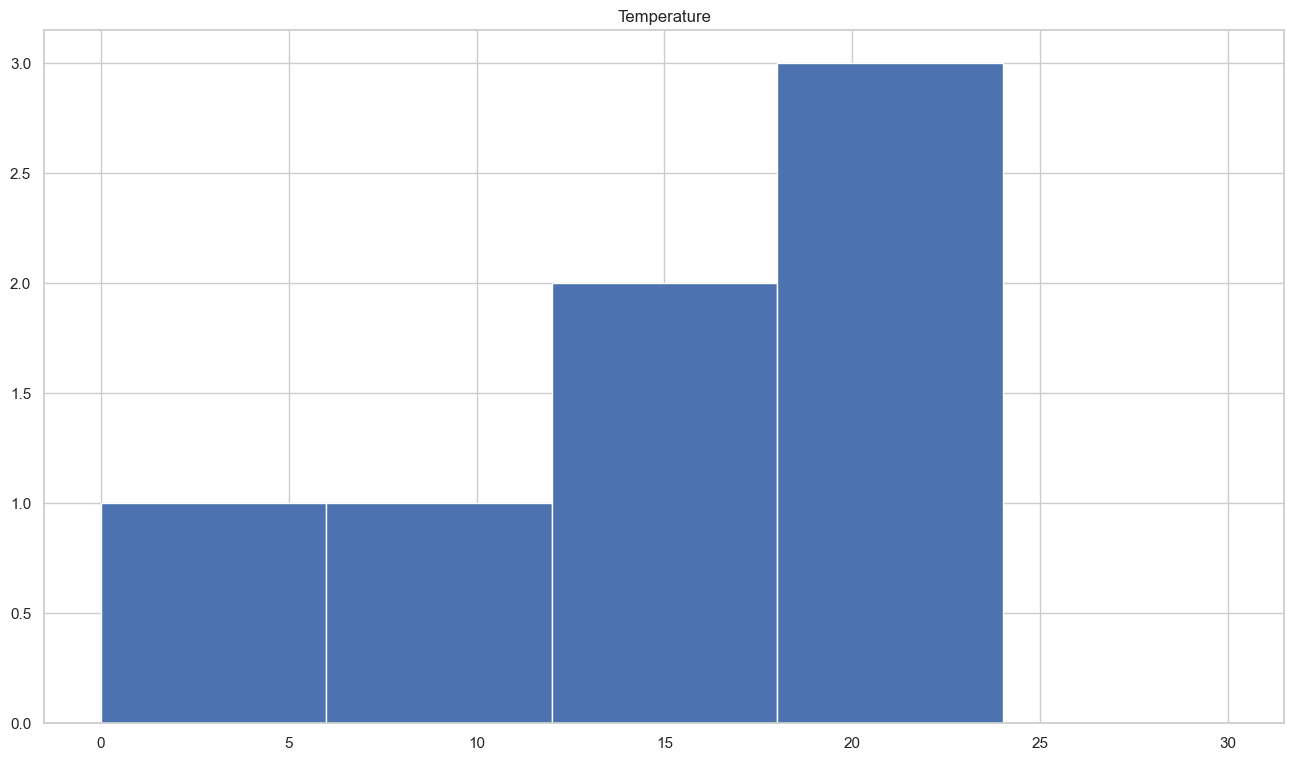

In [11]:

temp.hist("Temperature", bins=np.linspace(0,30,6))

plt.hist(temp, bins=np.linspace(5, 20, ))
plt.show()

#### We want to know cities and states with Temperature above 15 degress Celcius

In [12]:
# your answer here
above_fifteen = temp.loc[(temp['Temperature'] > 15)]
above_fifteen

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [13]:
# your answer here
above_fifteen = temp.loc[(temp['Temperature'] > 15)]
above_fifteen['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [14]:
above_fifteen = temp.loc[(temp['Temperature'] > 15) &
above_fifteen['City']

SyntaxError: unexpected EOF while parsing (1323731961.py, line 2)

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [15]:
# your answer here
temp.describe

<bound method NDFrame.describe of          City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000>

In [16]:
print(temp.groupby('State').mean())
print(temp.groupby('State').std())

             Temperature
State                   
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
             Temperature
State                   
Connecticut     1.964186
New Jersey      1.571348
New York        8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [17]:
# your answer here
employee = pd.read_csv("employee.csv")

#### Explore the data types of the Temp dataframe. Comment your results

In [18]:
# The temp dataframe consists of two objects and one float.
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

In [19]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

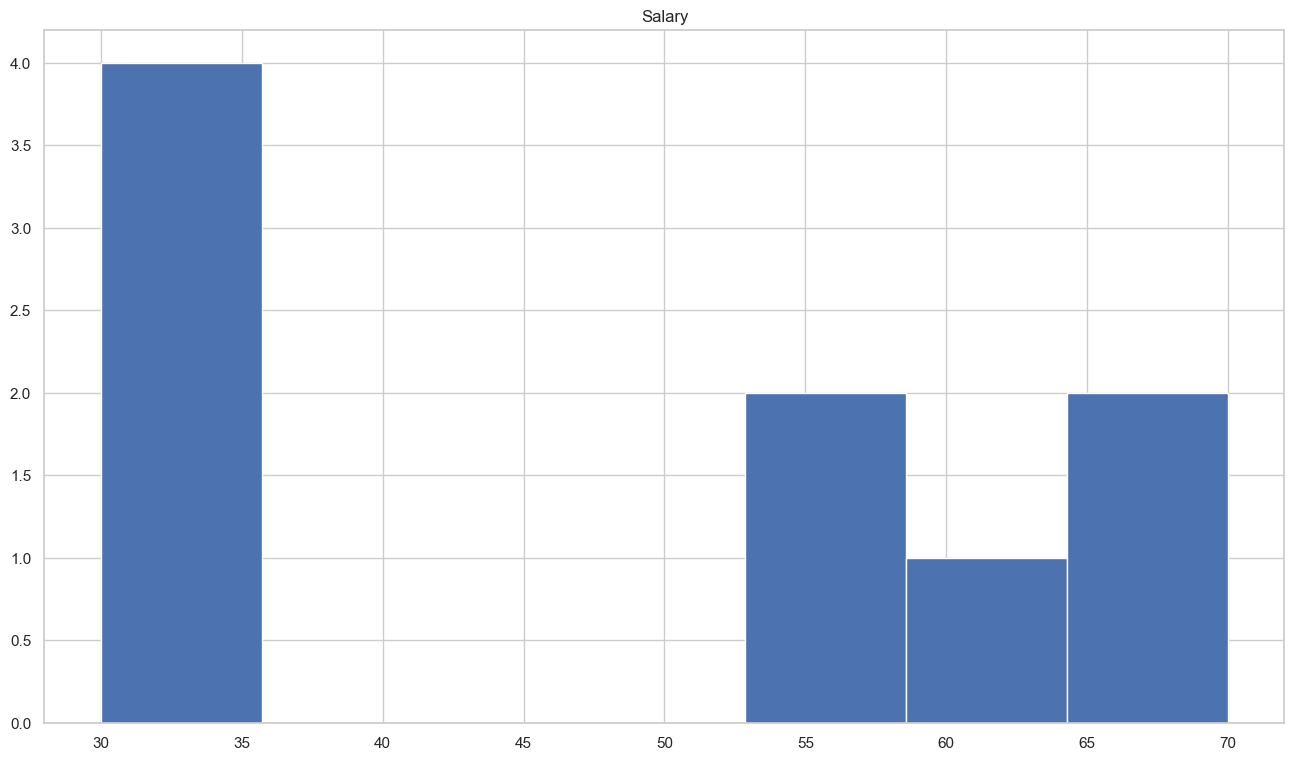

In [20]:
employee.hist("Salary", bins=7) 

#### What's the average salary in this company?

In [21]:
# your answer here
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [22]:
# your answer here
employee.Salary.max()

70

#### What's the lowest salary?

In [23]:
# your answer here
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [24]:
# your answer here
lowest_salary = employee.loc[(employee['Salary'] < 35)]
lowest_salary

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [25]:
# your answer here
display(lowest_salary.iloc[1])


Name            David
Department         HR
Education      Master
Gender              M
Title         analyst
Years               2
Salary             30
Name: 2, dtype: object

In [26]:
# your answer here
david = display(lowest_salary.iloc[1:6])

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [27]:
employee[employee['Name']== 'David']['Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [28]:
# your answer here
employee[employee['Title']== 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [29]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [30]:
# your answer here- 2nd method
employee_head = employee.iloc[0:3]
employee_head

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [31]:
# your answer here
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [32]:
employee[employee['Salary'] >= 55]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [33]:
# your answer here
print(employee.groupby('Years').mean())

          Salary
Years           
1      35.000000
2      38.333333
3      55.000000
4      35.000000
7      60.000000
8      70.000000


####  What is the average Salary per title?

In [34]:
# your answer here
print(employee.groupby('Title').mean())

           Years     Salary
Title                      
VP          8.00  70.000000
analyst     2.25  32.500000
associate   4.00  56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

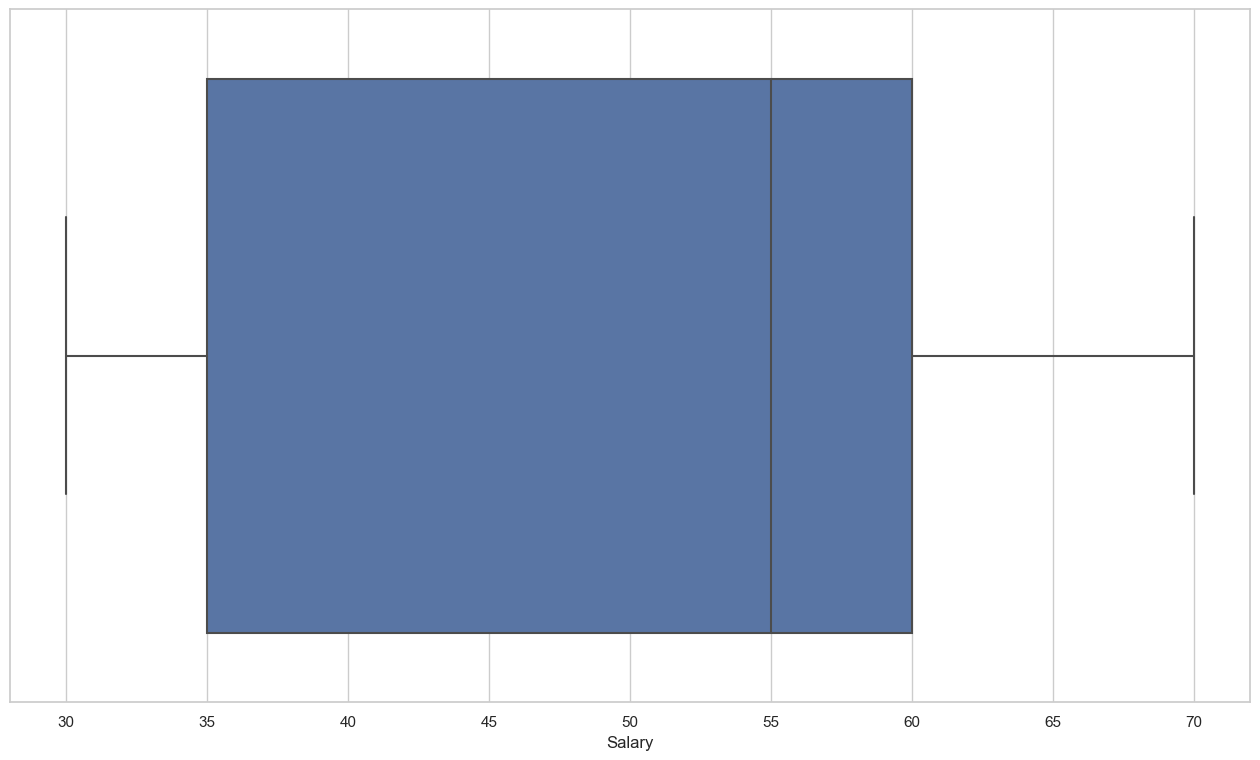

In [35]:
# draw boxplot here
sns.boxplot(x="Salary", data=employee);

In [38]:
# print first quartile here

employee.Salary.quantile(.25)

35.0

In [39]:
# print third quartile here
employee.Salary.quantile(.75)

60.0

#### Is the mean salary per gender different?

In [40]:
# your answer here
print(employee.groupby('Gender').mean())

        Years  Salary
Gender               
F         4.0    47.5
M         4.2    50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [42]:
# your answer here
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [ ]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [47]:
# your answer here
orders = pd.read_csv("orders.zip")

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [48]:
# your answer here
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [49]:
# your answer here
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

####  What is the average Purchase Price?

In [53]:
orders.amount_spent.mean()

22.39474850474768

#### What were the highest and lowest purchase prices? 

In [55]:
# your answer here
orders.amount_spent.max()

168469.6

In [56]:
# your answer here
orders.amount_spent.min()

0.0

#### Select all the customers we have in Spain

In [ ]:
# your answer here


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [58]:
# your answer here
orders['Country'].value_counts()['Spain']

2485

#### Select all the customers who have bought more than 50 items ?

In [ ]:
# your answer here

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here

#### Select all free orders

In [ ]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [60]:
# your answer here
orders['month'].value_counts()[7]

26827

#### What's the  average amount of money spent by country

In [64]:
# your answer here
print(orders.groupby('Country').mean())

                         Unnamed: 0      InvoiceNo         year      month  \
Country                                                                      
Australia             224857.287764  556217.951055  2010.972996   6.062447   
Austria               297239.085427  562367.633166  2010.979899   7.623116   
Bahrain               184964.000000  552790.411765  2011.000000   5.000000   
Belgium               276657.968981  560543.014279  2010.953225   7.404727   
Brazil                157314.500000  550201.000000  2011.000000   4.000000   
Canada                240605.867550  557964.476821  2011.000000   6.377483   
Channel Islands       255107.524064  558786.728610  2010.977273   6.791444   
Cyprus                236759.193811  556821.771987  2010.864821   7.311075   
Czech Republic        215563.200000  555053.600000  2011.000000   5.200000   
Denmark               299546.760526  562479.600000  2010.947368   7.905263   
EIRE                  289810.162476  561673.445012  2010.953855 

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [66]:
# your answer here
print(orders.groupby('year').mean())

         Unnamed: 0      InvoiceNo      month       day       hour   Quantity  \
year                                                                            
2010   19884.040482  538009.305122  12.000000  3.745528  12.897630  11.937309   
2011  296660.861310  562207.976246   7.303803  3.605338  12.716328  13.098138   

      UnitPrice    CustomerID  amount_spent  
year                                         
2010   3.132095  15529.088417     21.892733  
2011   3.115054  15277.794830     22.430074  
